Clique aqui para ter acesso ao [mini-paper](https://www.overleaf.com/7983964188fsswxxqddwgh).



# Atividade: 

## Implementar os seguintes atributos em uma imagem:

- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia

Utilizar a base de imagens do trabalho anterior
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.

Implemente as seguintes transformações de intensidade:
* Alargamento de contraste: s=T(r)=(1/(1+((k/r)E^))).
* Negativo: s=L−1−r.
* Logarítmico:s=clog(1+r).
* Potência: s=(cr)^y.

a. Cada transformação deverá ser implementada utilizando pelo menos 4 configurações diferentes de parâmetros (exceto o negativo). 

b. Utilize as funções de transformação de intensidade como pré-processamento do trabalho anterior, reporte os resultados de classificação obtidos com as diferentes funções.

    i. Adicione os resultados no relatório do trabalho anterior;

    ii. Na seção de metodologia adicione e explique as funções de alargamento de contraste;

    iii. Na seção de resultados adicione tabelas com os resultados obtidos pelas funções e explique as diferenças obtidas em cada transformação.

    iv. Adicione imagens que justifiquem suas explicações.

- Entrega e apresentação: 10/01/2022

In [4]:
from skimage.io import imread, imsave

import numpy as np

from scipy.stats import entropy, skew, kurtosis

from glob import glob

import os

from skimage.exposure import histogram

## DESCRITOR e LOAD DATA

In [5]:
def energy(x):
    return np.sum(np.power(x, 2))

In [6]:
def descritor_histograma(imagem):
    frequencias, _ = np.histogram(imagem, bins=256, density=True)

    media = np.mean(frequencias)

    var = np.var(frequencias)

    sk = skew(frequencias)

    kur = kurtosis(frequencias)

    ener = energy(frequencias)
    
    entr = entropy(frequencias)

    return [media,var,sk,kur,ener,entr]

## CLASSIFICAÇÃO 

In [7]:
DATABASE_PATH = 'COVID-19_Radiography_Dataset/'
# X, y = load_data(DATABASE_PATH, classes, 1000)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc

def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, shuffle=True, random_state=42)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test, pred)
    
    return acuracia

In [12]:
#classification(x, y)

## TRANSFORMAÇÕES DE INTENSIDADE e SALVAR IMAGENS TRANSFORMADAS

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

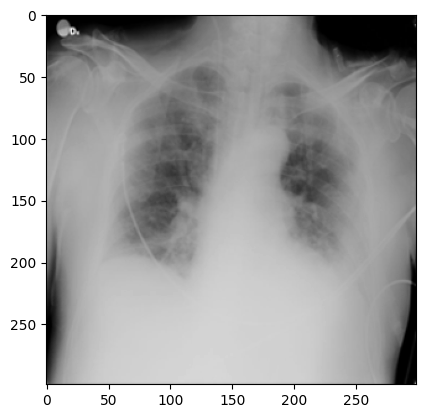

In [10]:
img = imread(DATABASE_PATH + '\COVID\images\COVID-1.png')

plt.imshow(img, cmap='gray')
plt.show()

In [11]:
def alargamento_de_contraste(img, k, E):  
    image_array = np.array(img, dtype='float')

    image_array[img>0] = 1/(1 + (k/image_array[img>0])**E)
    
    return np.array(image_array*255, dtype='uint8')

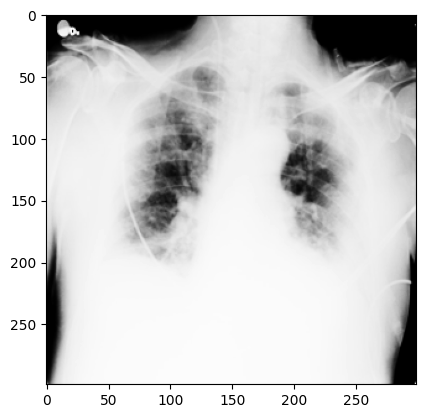

In [12]:
plt.imshow(alargamento_de_contraste(img, 100, 5), cmap='gray')
plt.show()

In [13]:
def negativo(img):
    return 255 - img

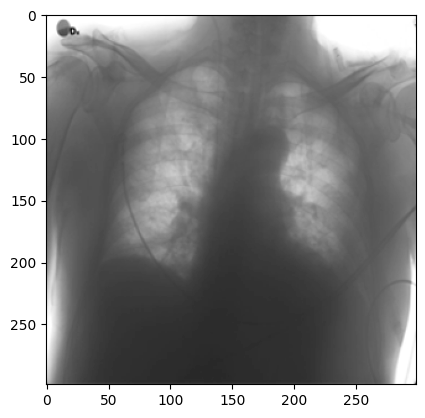

In [14]:
plt.imshow(negativo(img), cmap='gray')
plt.show()

In [16]:
def transformacao_logaritmica(img, c):
    img_array = c * np.log(np.where(1+img < 1, 1, 1+img))
    
    return np.array(img_array*255, dtype='uint8')

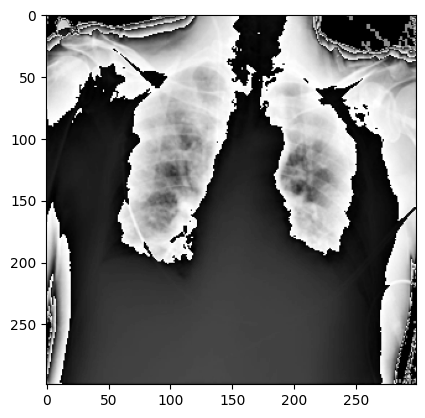

In [17]:
plt.imshow(transformacao_logaritmica(img, 0.8), cmap='gray')
plt.show()

In [18]:
def transformacao_potencia(img, y, c=1):
    image_array = np.array(img)
    
    return c * img ** y

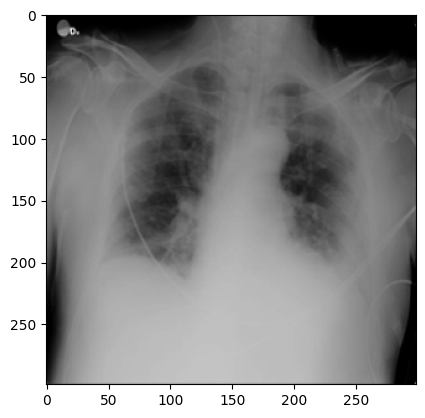

In [19]:
plt.imshow(transformacao_potencia(img, 1.5), cmap='gray')
plt.show()

In [20]:
values_E = [0.1, 0.5, 1, 1.5]
values_k = [30, 60, 110, 140]
values_c = [0.1, 0.15, 0.3, 0.6]
values_y = [0.3, 0.35, 0.4, 0.45]

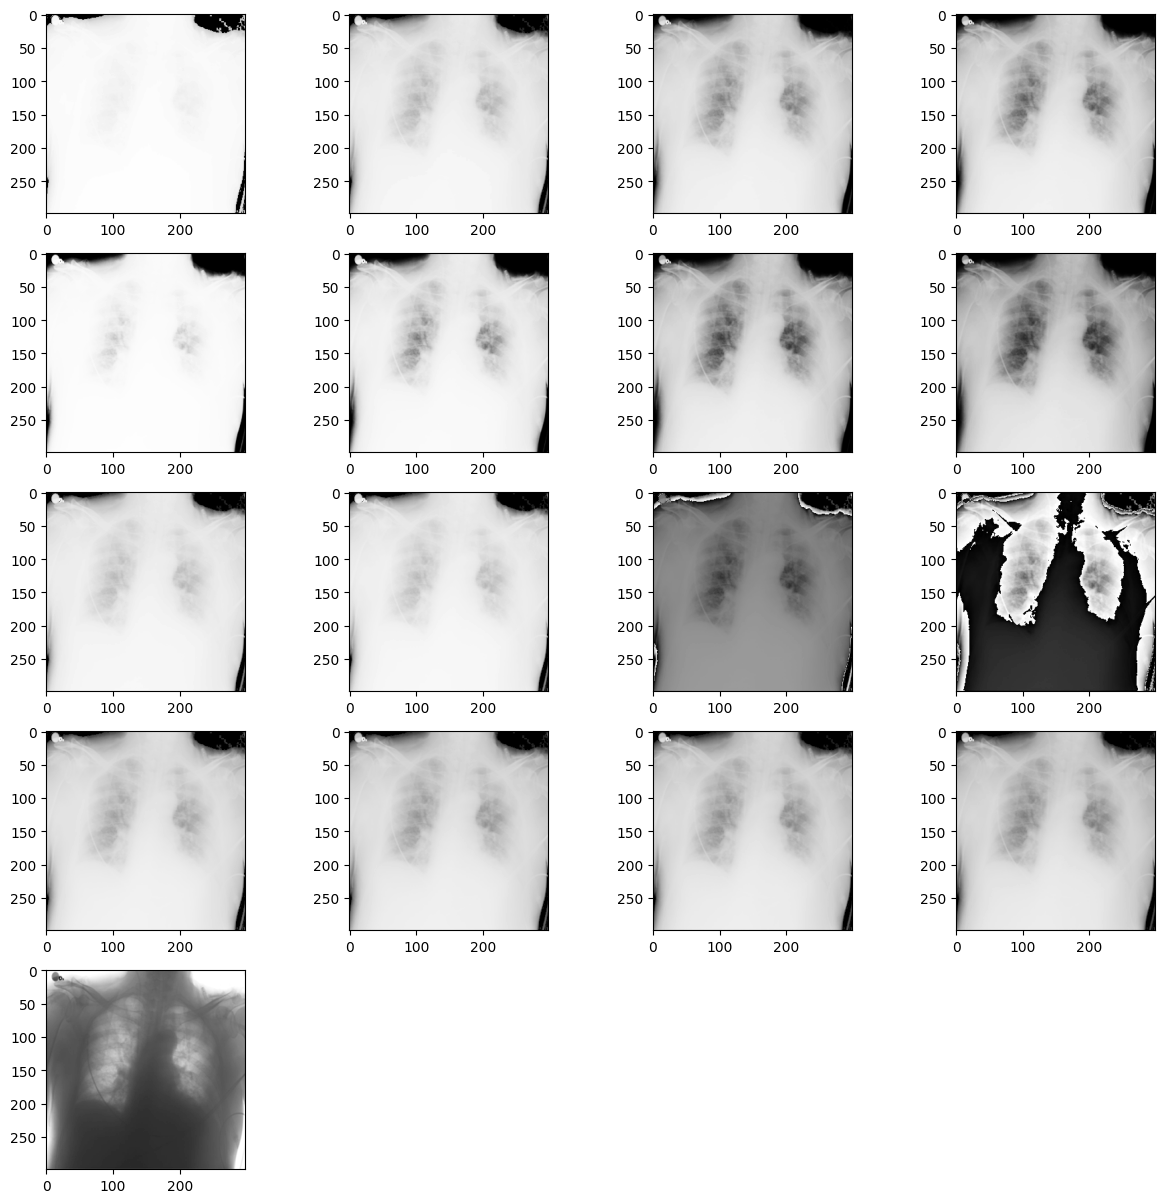

In [21]:
fig = plt.figure(figsize=(15, 15))
rows, columns = 5, 4
i = 0

img = imread(DATABASE_PATH + '\COVID\images\COVID-1.png')


for valor in values_E:
    i += 1
    fig.add_subplot(rows, columns, i)   
    plt.imshow(alargamento_de_contraste(img, 100, valor), cmap='gray')  
    plt.imsave(f'alargamento_contraste_K=100_E={valor}.png', alargamento_de_contraste(img, 100, valor), cmap='gray')

for valor in values_k:
    i += 1
    fig.add_subplot(rows, columns, i)   
    plt.imshow(alargamento_de_contraste(img, valor, 2), cmap='gray') 
    plt.imsave(f'alargamento_contraste_K={valor}_E=2.png', alargamento_de_contraste(img, valor, 2), cmap='gray')

for valor in values_c:
    i += 1
    fig.add_subplot(rows, columns, i)   
    plt.imshow(transformacao_logaritmica(img, valor), cmap='gray')   
    plt.imsave(f'transformacao_logaritmica_c={valor}.png', transformacao_logaritmica(img, valor), cmap='gray')
    
for valor in values_y:
    i += 1
    fig.add_subplot(rows, columns, i)   
    plt.imshow(transformacao_potencia(img, valor), cmap='gray')
    plt.imsave(f'transformacao_potencia_y={valor}.png', transformacao_potencia(img, valor), cmap='gray')

i += 1
fig.add_subplot(rows, columns, i)   
plt.imshow(negativo(img), cmap='gray')
plt.imsave(f'negativo.png', negativo(img), cmap='gray')    
            
plt.show()

In [22]:
def load_images(DATABASE_PATH, classes, qtd_imagens=1000):
    database = []
    
    for classe in classes:
        IMAGES_PATH = classe + '/images'

        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, IMAGES_PATH, '*.png'))
    
        imagens = []
        for IMAGE_NAME in IMAGES_NAME[0:qtd_imagens]:
            imagens.append(imread(IMAGE_NAME, as_gray=True))
            
        database.append(imagens)
    
    return database

In [23]:
def matrix_descritors(database, funcao=None):
    x = []
    y = []
    for classe, images in enumerate(database):
        for image in images:
            if funcao:
                image = funcao(image)
            
            x.append(descritor_histograma(image))
            y.append(classe)

    return x,y 

In [24]:
from functools import partial

DATABASE_PATH = 'COVID-19_Radiography_Dataset'

classes = ['Normal', 'COVID', 'Viral Pneumonia']

database = load_images(DATABASE_PATH, classes, 1000)


acuracias = []
    
X, y = matrix_descritors(database)
for _ in range(5):
    acuracias.append(classification(X, y))
    
print(f'normal')
print(f'Media 5 vezes: {np.mean(acuracias)}')
print()


for valor in values_E:
    acuracias = []
    
    X, y = matrix_descritors(database, partial(alargamento_de_contraste, k=30, E=valor))
    for _ in range(5):
        acuracias.append(classification(X, y))
    
    print(f'alargamento de contraste k=30 E={valor}')
    print(f'Media 5 vezes: {np.mean(acuracias)}')
    print()


for valor in values_k:
    acuracias = []
    
    X, y = matrix_descritors(database, partial(alargamento_de_contraste, k=valor, E=0.5))
    for _ in range(5):
        acuracias.append(classification(X, y))
    
    print(f'alargamento de contraste k={valor} E=0.5')
    print(f'Media 5 vezes: {np.mean(acuracias)}')
    print()

X, y = matrix_descritors(database, partial(negativo))
acuracias = []
for _ in range(5):
    acuracias.append(classification(X, y))
print(f'Negativo')
print(f'Media 5 vezes: {np.mean(acuracias)}')
print()    

for valor in values_c:
    acuracias = []
    
    X, y = matrix_descritors(database, partial(transformacao_logaritmica, c=valor))
    for _ in range(5):
        acuracias.append(classification(X, y))
    
    print(f'transformacao logaritmica c={valor}')
    print(f'Media 5 vezes: {np.mean(acuracias)}')
    print()    
    
for valor in values_y:
    acuracias = []
    
    X, y = matrix_descritors(database, partial(transformacao_potencia, y=valor))
    for _ in range(5):
        acuracias.append(classification(X, y))
    
    print(f'transformacao potencia y={valor}')
    print(f'Media 5 vezes: {np.mean(acuracias)}')
    print()  

normal
Media 5 vezes: 0.5413333333333333

alargamento de contraste k=30 E=0.1
Media 5 vezes: 0.5206666666666666

alargamento de contraste k=30 E=0.5
Media 5 vezes: 0.5563333333333335

alargamento de contraste k=30 E=1
Media 5 vezes: 0.596

alargamento de contraste k=30 E=1.5
Media 5 vezes: 0.5516666666666667

alargamento de contraste k=30 E=0.5
Media 5 vezes: 0.543

alargamento de contraste k=60 E=0.5
Media 5 vezes: 0.6163333333333334

alargamento de contraste k=110 E=0.5
Media 5 vezes: 0.6136666666666666

alargamento de contraste k=140 E=0.5
Media 5 vezes: 0.6023333333333334

Negativo
Media 5 vezes: 0.5109999999999999

transformacao logaritmica c=0.1
Media 5 vezes: 0.5773333333333334

transformacao logaritmica c=0.15
Media 5 vezes: 0.5736666666666667

transformacao logaritmica c=0.3
Media 5 vezes: 0.5656666666666668

transformacao logaritmica c=0.6
Media 5 vezes: 0.558

transformacao potencia y=0.3
Media 5 vezes: 0.6253333333333334

transformacao potencia y=0.35
Media 5 vezes: 0.62933

## CREATE CSV

In [28]:
import csv

def cria_csv(nome, valores):
    with open(nome, 'w') as f: 
        write = csv.writer(f) 

        write.writerow(['media', 'variancia', 'skewness', 'kurtosis', 'energy', 'entropy', 'doenca']) 
        write.writerows(valores) 

In [29]:
def load_data(DATABASE_PATH, classes, qtd_imagens=1000, funcao=None):
    matriz = []
    
    for i, classe in enumerate(classes):
        IMAGES_PATH = classe + '/images'

        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, IMAGES_PATH, '*.png'))

        for IMAGE_NAME in IMAGES_NAME[0:qtd_imagens]:
            img = imread(IMAGE_NAME, as_gray=True)
            
            if funcao:
                img = funcao(img)

            instancia = (descritor_histograma(img))
            instancia.append(i)
            
            matriz.append(instancia)

    return matriz

In [31]:
from functools import partial

DATABASE_PATH = 'COVID-19_Radiography_Dataset'

classes = ['Normal', 'COVID', 'Viral Pneumonia']

cria_csv('normal.csv', load_data(DATABASE_PATH, classes, 1000))
    
for valor in values_E:
    cria_csv(f'alargamento de contraste k=30 E={valor}.csv', load_data(DATABASE_PATH, classes, 1000, partial(alargamento_de_contraste, k=30, E=valor)))

cria_csv(f'negativo.csv', load_data(DATABASE_PATH, classes, 1000, partial(negativo)))

for valor in values_k:
    cria_csv(f'alargamento de contraste k={valor} E=0.5.csv', load_data(DATABASE_PATH, classes, 1000, partial(alargamento_de_contraste, k=valor, E=0.5)))

for valor in values_c:
    cria_csv(f'transformacao logaritmica c={valor}.csv', load_data(DATABASE_PATH, classes, 1000, partial(transformacao_logaritmica, c=valor)))

for valor in values_y:
    cria_csv(f'transformacao potencia y={valor}.csv', load_data(DATABASE_PATH, classes, 1000, partial(transformacao_potencia, y=valor)))

### Plotar os atributos dois a dois (scatter plot)

In [32]:
def load_data_plot(DATABASE_PATH, classes, qtd_imagens=1000):
    matriz = []
    
    for i, classe in enumerate(classes):
        IMAGES_PATH = classe + '/images'

        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, IMAGES_PATH, '*.png'))
        
        for IMAGE_NAME in IMAGES_NAME[0:qtd_imagens]:
            img = imread(IMAGE_NAME, as_gray=True)
    
            instancia = descritor_histograma(img)
            instancia.append(i)
            
            matriz.append(instancia)
        
    return matriz

In [33]:
# Importar as bibliotecas utilziadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
classes = ['Normal', 'COVID', 'Viral Pneumonia']

In [35]:
dataset = pd.DataFrame(load_data_plot(DATABASE_PATH, classes, qtd_imagens=1000), columns=['media', 'variancia', 'skewness', 'kurtosis', 'energy', 'entropy', 'doenca'])

In [36]:
def plot_scatter(dataset: pd.core.frame.DataFrame, height: str, weight: str, classe: str):
    dataset.plot(kind='scatter', title=height+' X '+weight, x=height, y=weight, alpha=1, c=dataset[classe], figsize=(10,7), cmap=plt.get_cmap('jet'))
    plt.savefig(f'{height} x {weight}.png')
    plt.show()

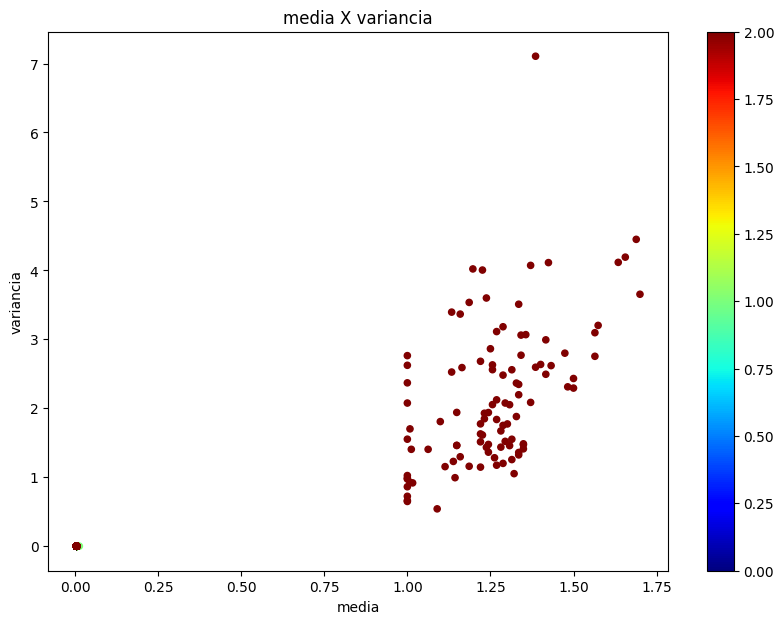

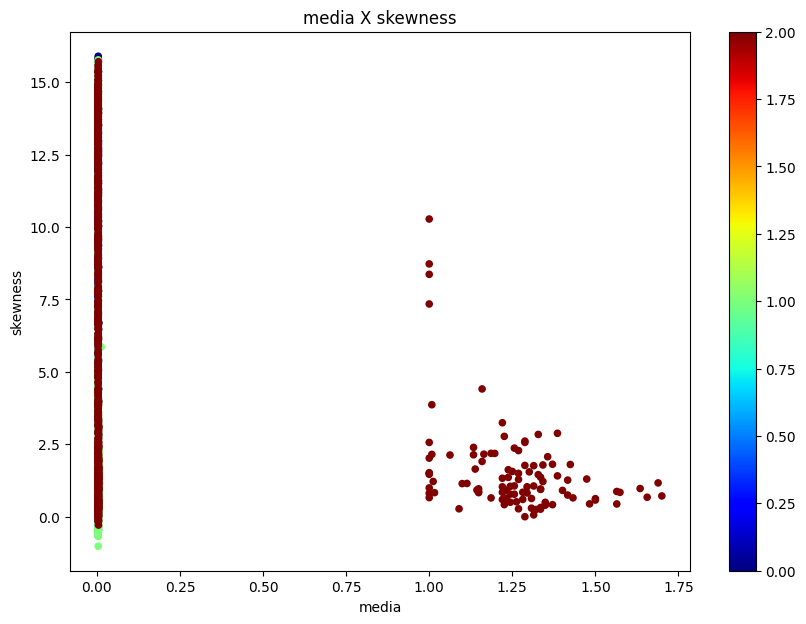

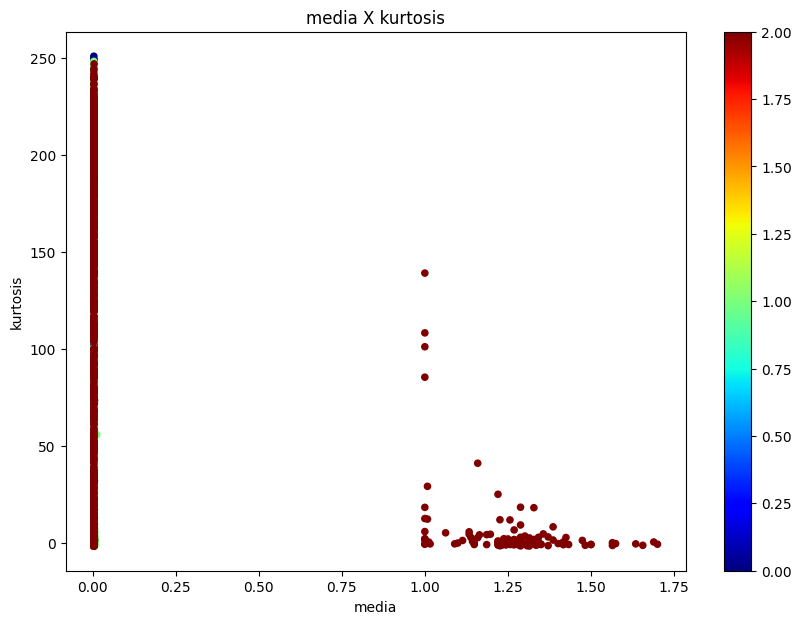

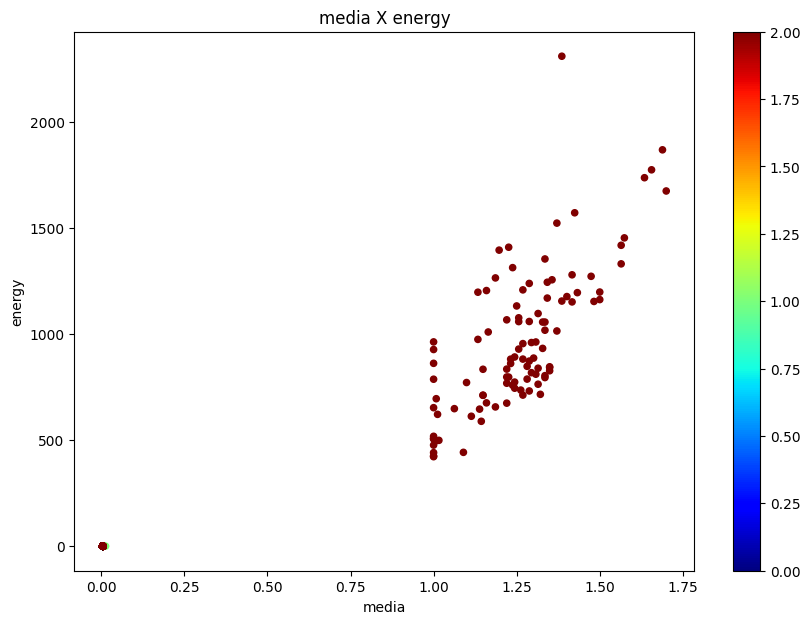

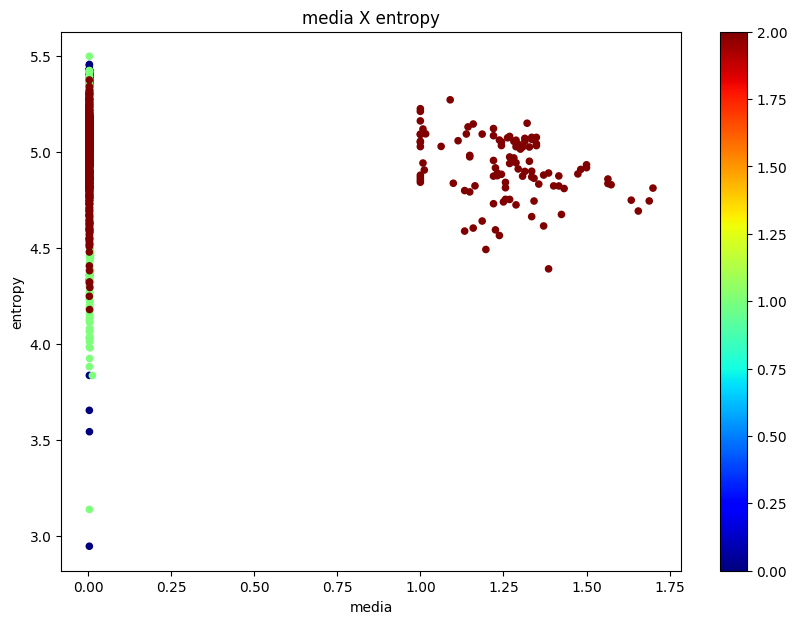

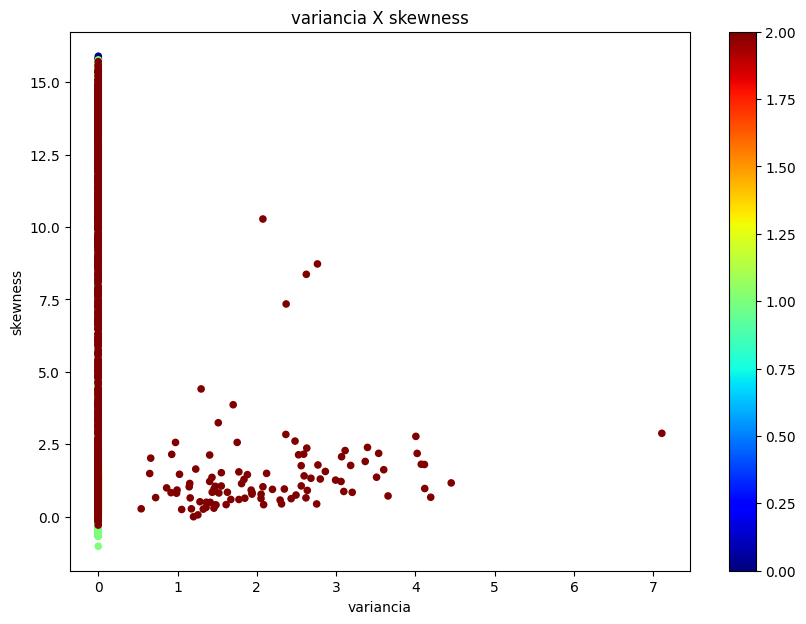

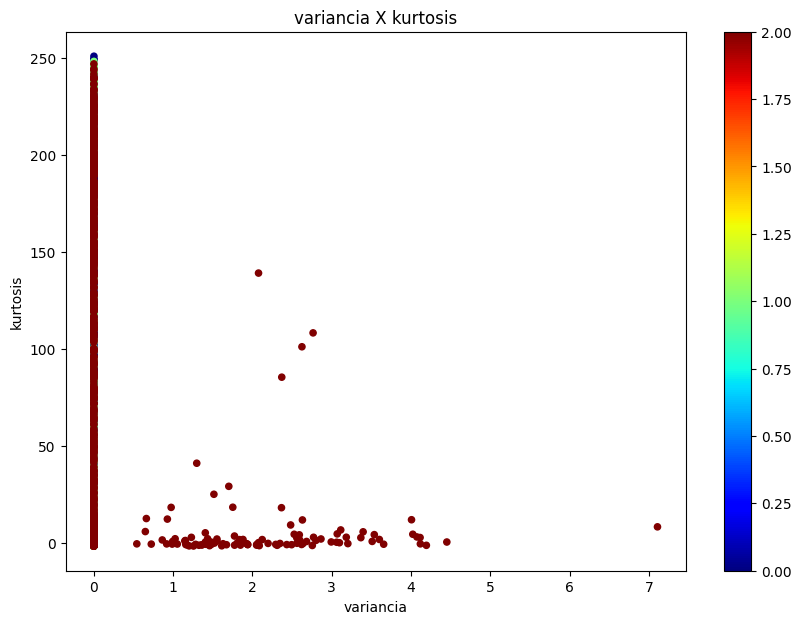

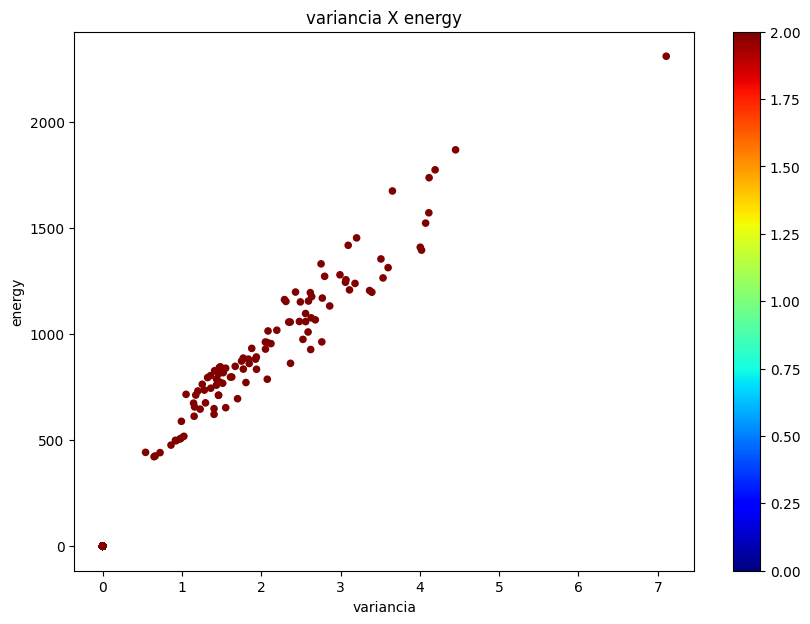

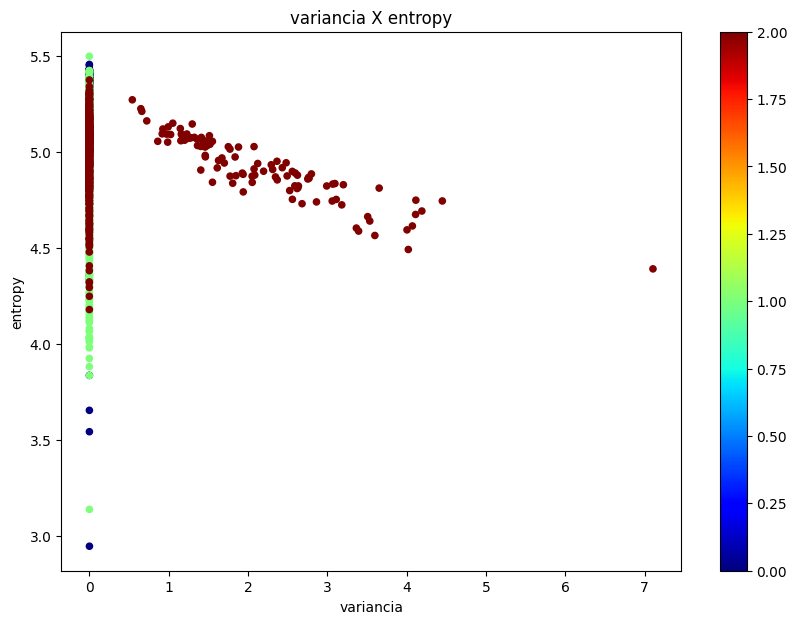

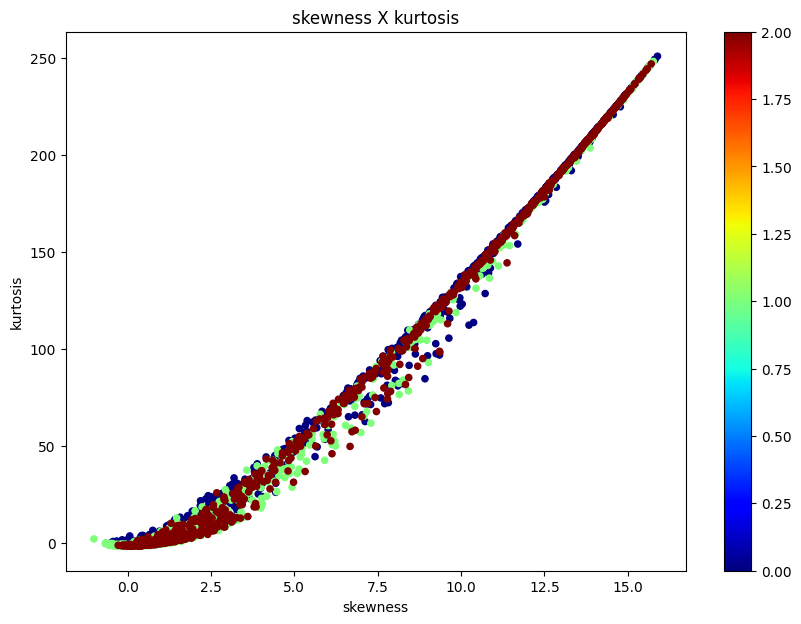

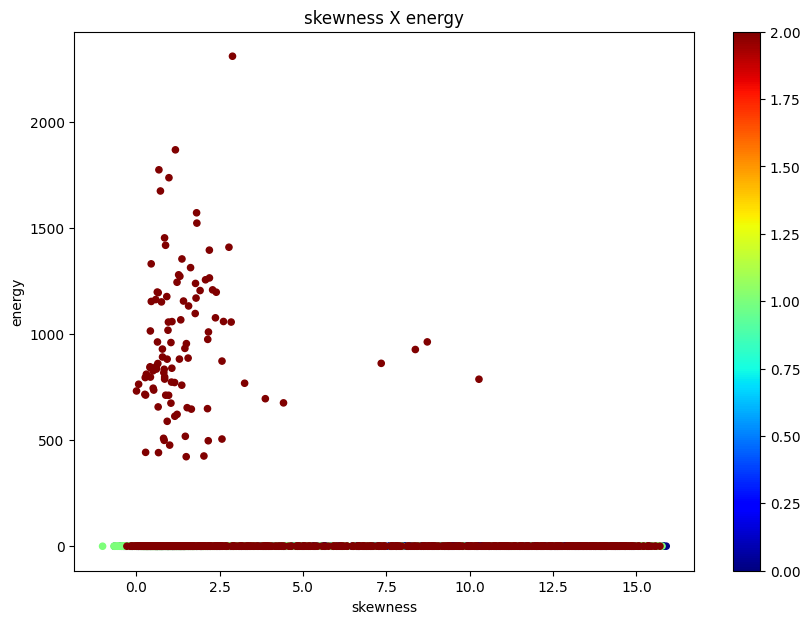

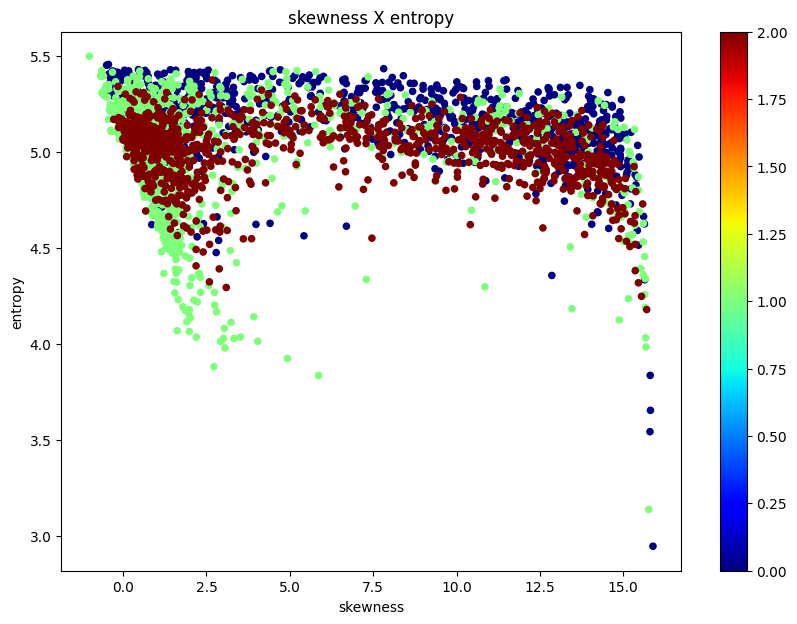

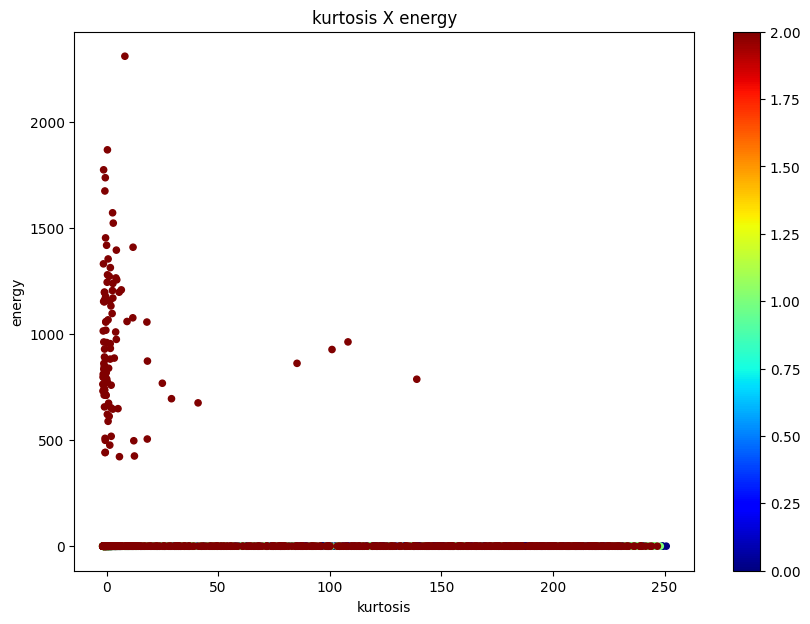

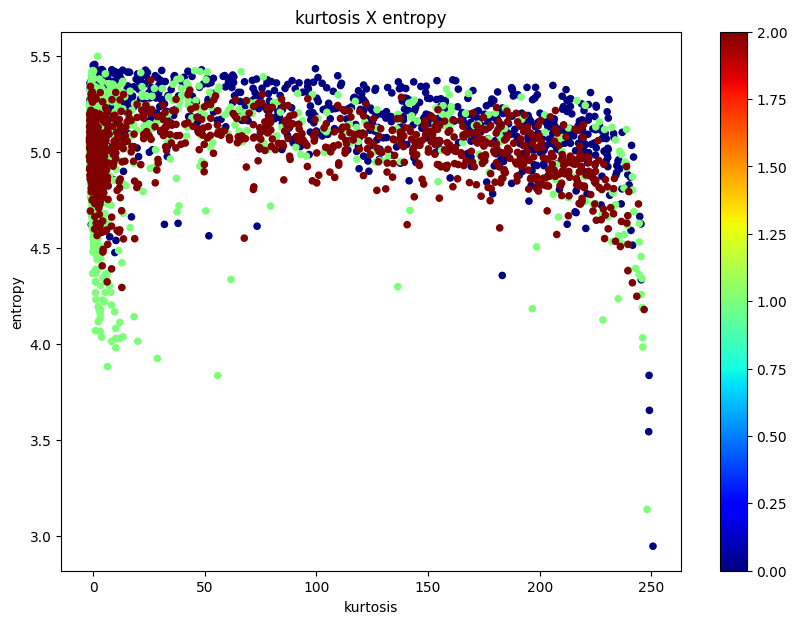

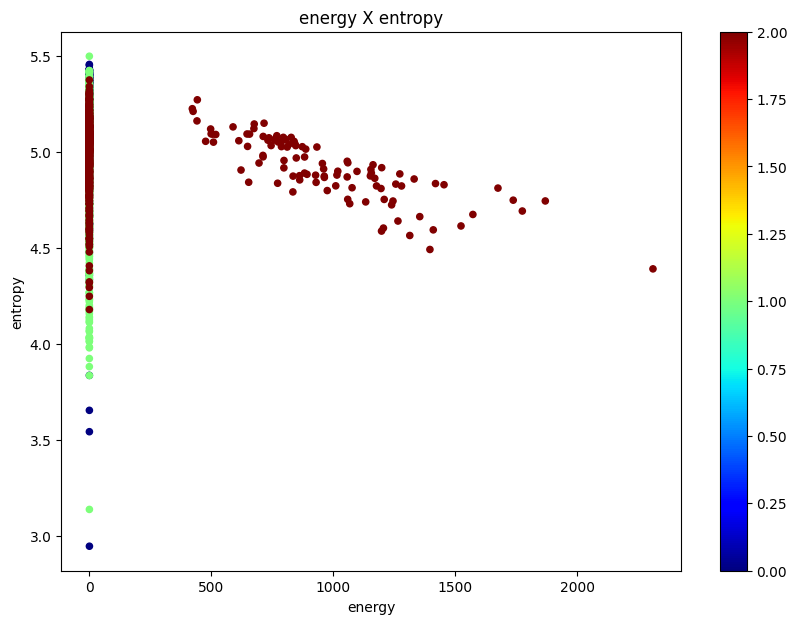

In [37]:
index_columns = list(range(6))
index_columns_copy = index_columns.copy()
for index_i in index_columns:
  index_columns_copy.pop(0)
  for index_j in index_columns_copy:
    plot_scatter(dataset, dataset.columns[index_i], dataset.columns[index_j], 'doenca')

## Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;

In [2]:
# %pip install pandas
# %pip install matplotlib
# %pip install numpy
# %pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
X, y = matrix_descritors(database)

In [62]:
X = np.asanyarray(X)

In [39]:
X.shape

(3000, 6)

In [63]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = 'Normal'
    elif y[i] == 1:
        y[i] = 'COVID'
    else:
        y[i] = 'Viral Pneumonia'

In [71]:
def visualize_2d(X,y,algorithm="pca",title="PCA: Multiclass Classification",figsize=(15,8)):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    if algorithm=="tsne":
        reducer = TSNE(n_components=3,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=3,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    if X.shape[1]>2:
        X = reducer.fit_transform(X)
        
    else:
        if type(X)==pd.DataFrame:
        	X=X.values
    _,(ax1) = plt.subplots(nrows=1, ncols=1,figsize=figsize)
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax1);
    ax1.set_title(title);
    plt.show();

In [90]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
# X, y = matrix_descritors(database)
# X = np.asanyarray(X)
# reducer = TSNE(n_components=3,random_state=47,n_iter=400,angle=0.6)
# X = reducer.fit_transform(X)

In [91]:
#print(classification(X, y))

0.5016666666666667


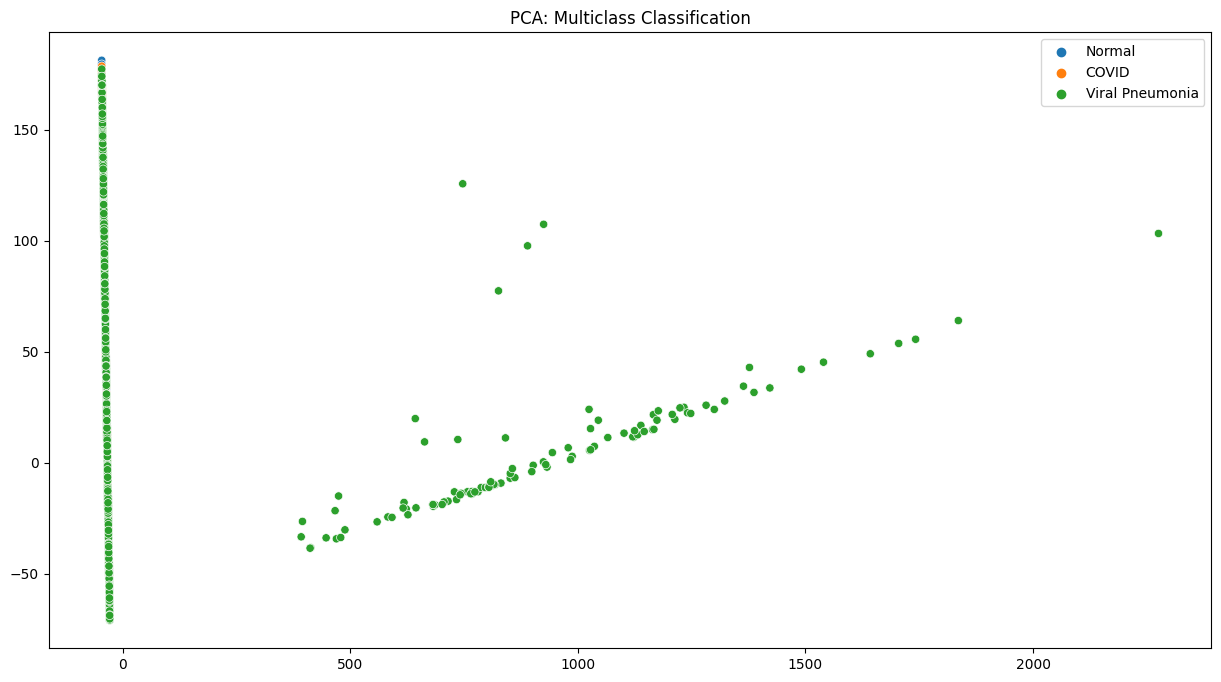

In [72]:
visualize_2d(X=X,y=y)